In [1]:
import numpy as np
from sklearn import tree



In [5]:
def give_nodes(nodes,amount_of_branches,left,right):
    amount_of_branches*=2
    nodes_splits=[]
    for node in nodes:
        nodes_splits.append(left[node])
        nodes_splits.append(right[node])
    return (nodes_splits,amount_of_branches)

def plot_tree(tree, feature_names):
    from matplotlib import gridspec 
    import matplotlib.pyplot as plt
    from matplotlib import rc
    import pylab
        
    color = plt.cm.coolwarm(np.linspace(1,0,len(feature_names)))
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='sans-serif')
    plt.rc('font', size=14)

    params = {'legend.fontsize': 20,
             'axes.labelsize': 20,
             'axes.titlesize':25,
             'xtick.labelsize':20,
             'ytick.labelsize':20}
    plt.rcParams.update(params)

    max_depth=tree.max_depth
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    
    fig = plt.figure(figsize=(1.5*2**max_depth,1*2**max_depth))
    gs = gridspec.GridSpec(max_depth, 2**max_depth)
    plt.subplots_adjust(hspace = 0.6, wspace=0.8)
     
    # All data
    amount_of_branches=1
    nodes=[0]
    normalize=np.sum(value[0][0])
    
    for i,node in enumerate(nodes):
        ax=fig.add_subplot(gs[0,(2**max_depth*i)/amount_of_branches:(2**max_depth*(i+1))/amount_of_branches])
        ax.set_title( features[node]+"$<= "+str(threshold[node])+"$")
        if( i==0): ax.set_ylabel(r'$\%$')
        ind=np.arange(1,len(value[node][0])+1,1)
        width=0.2
        bars= (np.array(value[node][0])/normalize)*100
        plt.bar(ind-width/2, bars, width,color=color,alpha=1,linewidth=0)
        plt.xticks(ind, [int(i) for i in ind-1])
        pylab.ticklabel_format(axis='y',style='sci',scilimits=(0,2))

    # Splits
    for j in range(1,max_depth):
        nodes,amount_of_branches=give_nodes(nodes,amount_of_branches,left,right)
        for i,node in enumerate(nodes):
            ax=fig.add_subplot(gs[j,(2**max_depth*i)/amount_of_branches:(2**max_depth*(i+1))/amount_of_branches])
            ax.set_title( features[node]+"$<= "+str(threshold[node])+"$")
            if( i==0): ax.set_ylabel(r'$\%$')
            ind=np.arange(1,len(value[node][0])+1,1)
            width=0.2
            bars= (np.array(value[node][0])/normalize)*100
            plt.bar(ind-width/2, bars, width,color=color,alpha=1,linewidth=0)
            plt.xticks(ind, [int(i) for i in ind-1])
            pylab.ticklabel_format(axis='y',style='sci',scilimits=(0,2))


    plt.tight_layout()
    return fig
    
             


<IPython.core.display.Javascript object>


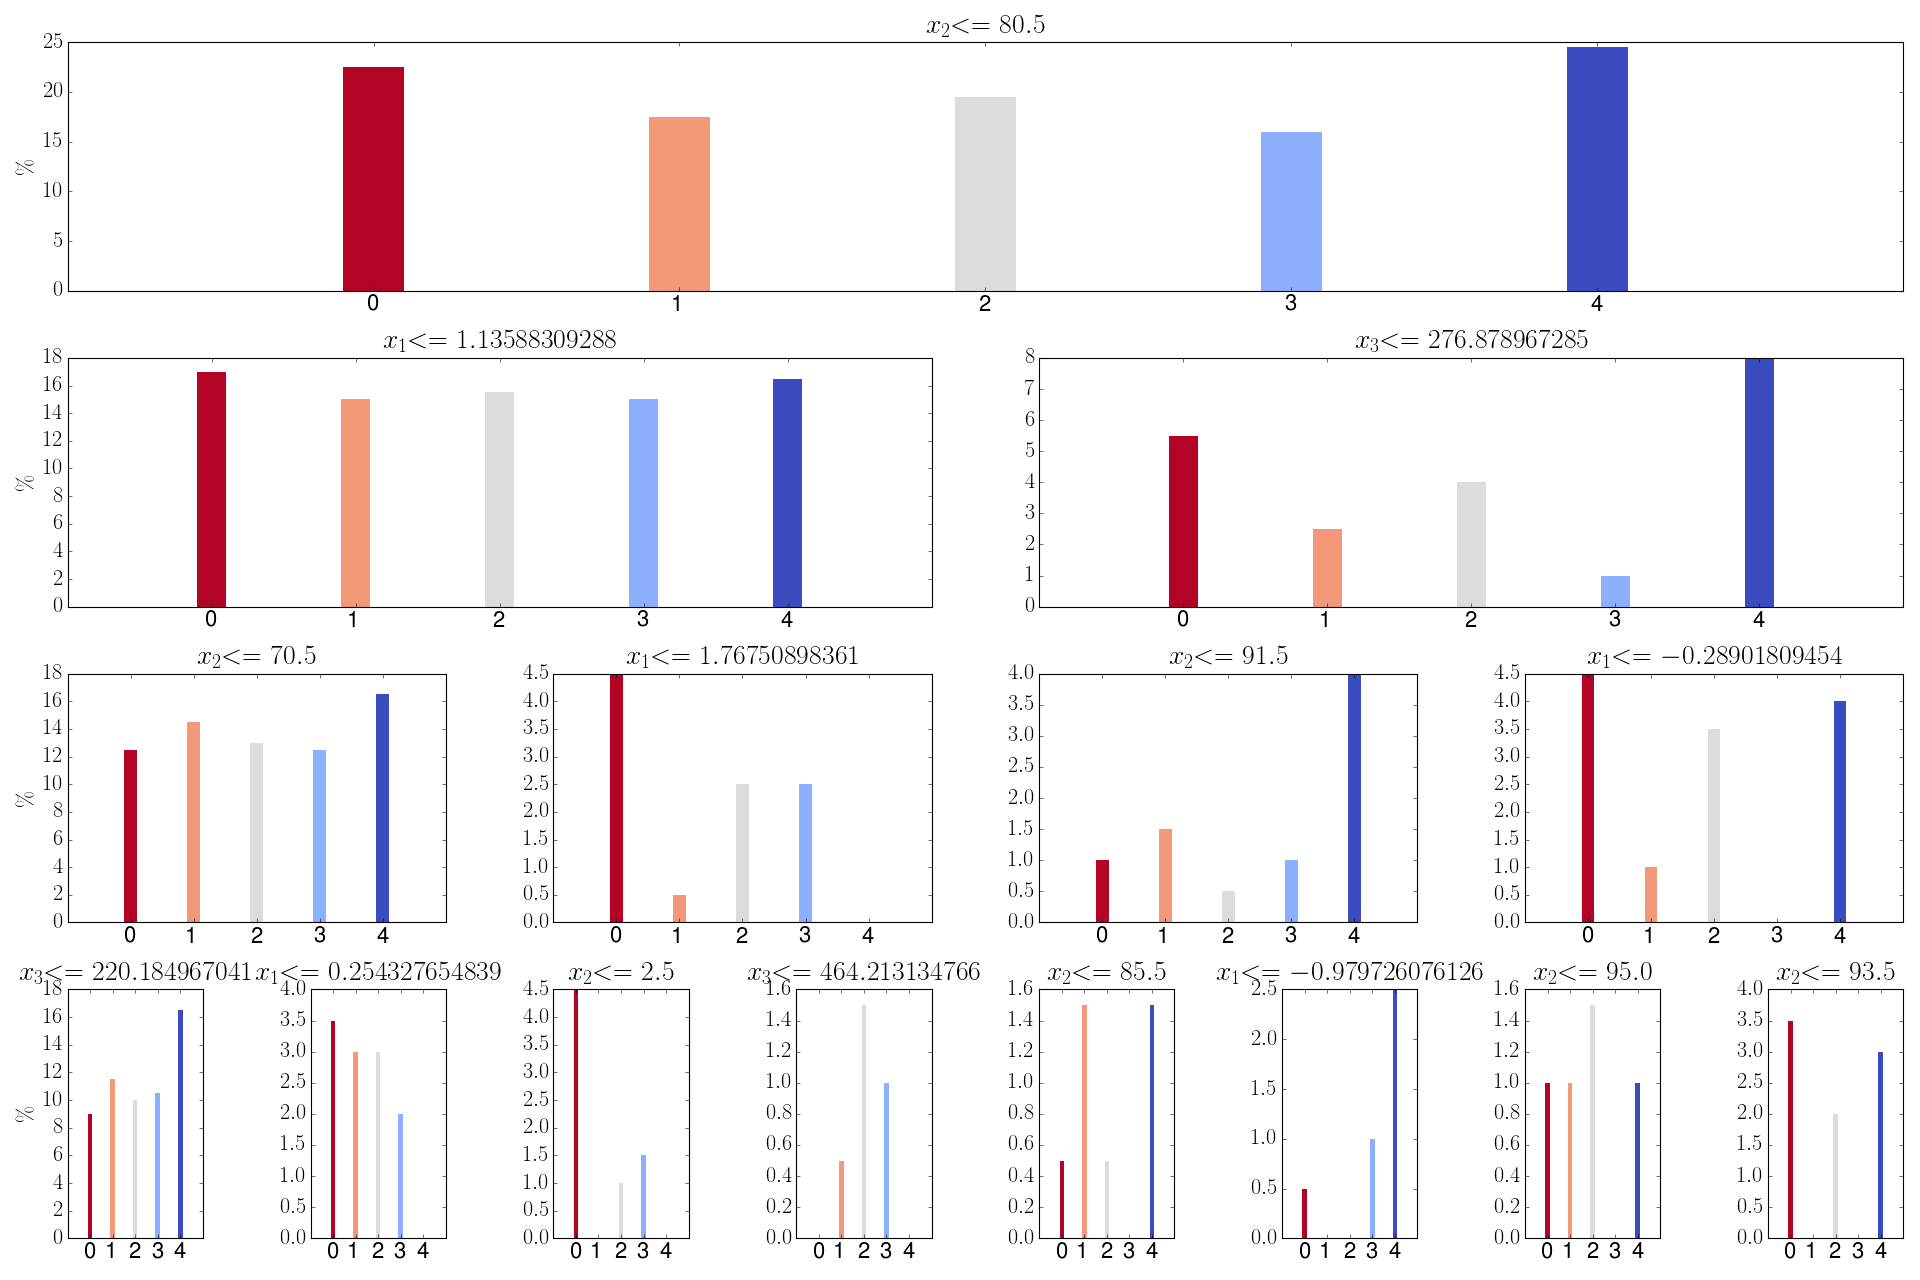

In [6]:
%matplotlib notebook
X=[]
Y=[]
amount_of_labels=5
feature_names=[ '$x_1$','$x_2$','$x_3$','$x_4$','$x_5$']
for i in range(200):
    X.append([np.random.normal(),np.random.randint(0,100),np.random.uniform(200,500) ])
    Y.append(np.random.randint(0,amount_of_labels))

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf = clf.fit(X,Y )
fig=plot_tree(clf, feature_names)